## Linear Regression Case study - Practice : 

In [166]:
import pandas as pd
import numpy as np
from scipy import stats
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-poster')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,7.5
plt.rcParams['axes.grid'] = True
plt.gray()


<Figure size 720x540 with 0 Axes>

Now we'll import all the libraries used for machine learning

In [167]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor ,GradientBoostingRegressor 

In [168]:
car_sales = pd.read_csv(r'C:\Users\SHIVAM-PC\Desktop\AnalytixLabs\Bangalore Batch\BA CLASSES 3-4 Files\Case Study - Automobile Example\Car_sales.csv')

In [169]:
car_sales

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [170]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [171]:
car_sales.describe()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


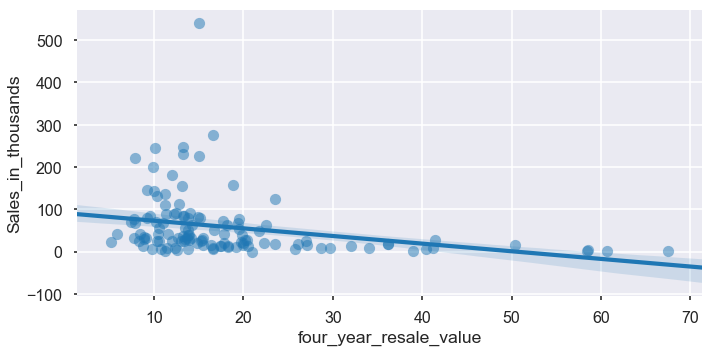

In [172]:
sns.lmplot(x = 'four_year_resale_value' , y ='Sales_in_thousands' , data = car_sales , aspect = 2 , 
          scatter_kws = {'alpha' : 0.5} )


In [173]:
car_sales.dtypes

Manufacturer               object
Model                      object
Sales_in_thousands        float64
four_year_resale_value    float64
Vehicle_type               object
Price_in_thousands        float64
Engine_size               float64
Horsepower                float64
Wheelbase                 float64
Width                     float64
Length                    float64
Curb_weight               float64
Fuel_capacity             float64
Fuel_efficiency           float64
Latest_Launch              object
Power_perf_factor         float64
dtype: object

In [174]:
a = dict(car_sales.dtypes)
a

{'Curb_weight': dtype('float64'),
 'Engine_size': dtype('float64'),
 'Fuel_capacity': dtype('float64'),
 'Fuel_efficiency': dtype('float64'),
 'Horsepower': dtype('float64'),
 'Latest_Launch': dtype('O'),
 'Length': dtype('float64'),
 'Manufacturer': dtype('O'),
 'Model': dtype('O'),
 'Power_perf_factor': dtype('float64'),
 'Price_in_thousands': dtype('float64'),
 'Sales_in_thousands': dtype('float64'),
 'Vehicle_type': dtype('O'),
 'Wheelbase': dtype('float64'),
 'Width': dtype('float64'),
 'four_year_resale_value': dtype('float64')}

In [175]:
# Creating numerical and categorical data subsets.
numerical_var_names = [key for key in a if a[key] in ['float64' , 'int64' , 'int32' , 'float32']]
categorical_var_names = [key for key in a if a[key] in ['object']]


car_sales_num = car_sales[numerical_var_names]
car_sales_cat = car_sales[categorical_var_names]


In [176]:
car_sales_num.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,NaN
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639


In [177]:
car_sales_cat.head()

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011


***

## <font color=grey>Creating Data Audit Report : </font>

In [178]:
# using general function to return multiple values out of numerical data.
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min() ,x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [179]:
num_summary = car_sales_num.apply(var_summary)
num_summary.T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.698000,52.998076,29.450000,68.029422,4628.002257,0.110000,0.93728,1.870800,5.453600,14.114000,29.450000,67.956000,127.641600,185.336200,260.645320,540.561000
four_year_resale_value,121.0,36.0,2186.830000,18.072975,14.180000,11.453384,131.180007,5.160000,6.17300,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,60.220000,67.550000
Price_in_thousands,155.0,2.0,4245.567000,27.390755,22.799000,14.351653,205.969949,9.235000,10.23144,12.469000,13.970800,18.017500,22.799000,31.947500,44.017000,55.835000,78.479800,85.500000
Engine_size,156.0,1.0,477.500000,3.060897,3.000000,1.044653,1.091300,1.000000,1.55500,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.775000,5.700000,8.000000
Horsepower,156.0,1.0,29008.000000,185.948718,177.500000,56.700321,3214.926385,55.000000,96.40000,114.500000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,325.750000,450.000000
Wheelbase,156.0,1.0,16768.000000,107.487179,107.000000,7.641303,58.389512,92.600000,92.87500,95.875000,98.650000,103.000000,107.000000,112.200000,115.500000,119.250000,134.375000,138.700000
Width,156.0,1.0,11099.400000,71.150000,70.550000,3.451872,11.915419,62.600000,66.08500,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,79.190000,79.900000
Length,156.0,1.0,29225.600000,187.343590,187.900000,13.431754,180.412023,149.400000,154.91500,163.675000,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,219.305000,224.500000
Curb_weight,155.0,2.0,523.594000,3.378026,3.342000,0.630502,0.397532,1.895000,2.24540,2.423500,2.606200,2.971000,3.342000,3.799500,4.118600,4.389100,5.396680,5.572000
Fuel_capacity,156.0,1.0,2800.500000,17.951923,17.200000,3.887921,15.115932,10.300000,11.90000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,30.900000,32.000000


## <font color=indigo>Pandas Profiling : </font>

In [180]:
pandas_profiling.ProfileReport(car_sales)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### <font color=seablue>Handling Outliers - All numerical Data :</font>

In [181]:
# Capping and flooring using clip_upper and clip lower

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.05))
    return x

car_sales_num = car_sales_num.apply(outlier_capping)

In [182]:
car_sales_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,7619.795000,48.533726,29.450000,49.600320,2460.191752,1.870800,1.870800,1.871760,5.453600,14.114000,29.450000,67.956000,127.641600,182.466440,185.336200,185.336200
four_year_resale_value,121.0,36.0,2102.590000,17.376777,14.180000,8.973437,80.522578,7.850000,7.850000,7.850000,9.125000,11.260000,14.180000,19.875000,32.075000,41.250000,41.250000,41.250000
Price_in_thousands,155.0,2.0,4126.998000,26.625794,22.799000,11.767895,138.483344,12.469000,12.469000,12.515200,13.970800,18.017500,22.799000,31.947500,44.017000,54.554000,55.835000,55.835000
Engine_size,156.0,1.0,471.800000,3.024359,3.000000,0.908499,0.825371,1.800000,1.800000,1.800000,1.950000,2.300000,3.000000,3.575000,4.600000,4.718750,4.775000,4.775000
Horsepower,156.0,1.0,28932.000000,185.461538,177.500000,50.948853,2595.785608,114.500000,114.500000,114.875000,120.000000,149.500000,177.500000,215.000000,254.000000,300.000000,300.000000,300.000000
Wheelbase,156.0,1.0,16720.600000,107.183333,107.000000,6.306485,39.771753,95.875000,95.875000,96.043750,98.650000,103.000000,107.000000,112.200000,115.500000,119.062500,119.250000,119.250000
Width,156.0,1.0,11099.000000,71.147436,70.550000,3.314182,10.983800,66.500000,66.500000,66.500000,66.900000,68.400000,70.550000,73.425000,76.200000,78.200000,78.200000,78.200000
Length,156.0,1.0,29217.700000,187.292949,187.900000,12.068163,145.640563,163.675000,163.675000,163.768750,173.000000,177.575000,187.900000,196.125000,203.400000,208.500000,208.500000,208.500000
Curb_weight,155.0,2.0,520.180800,3.356005,3.342000,0.541847,0.293598,2.423500,2.423500,2.424550,2.606200,2.971000,3.342000,3.799500,4.118600,4.387630,4.389100,4.389100
Fuel_capacity,156.0,1.0,2781.400000,17.829487,17.200000,3.396131,11.533706,12.500000,12.500000,12.500000,13.200000,15.800000,17.200000,19.575000,23.200000,25.400000,25.400000,25.400000


### <font color=seablue>Handling Missings - Fill with mean :</font>

In [183]:
# creating function to impute missings with mean value : 

def missing_imputation(x):
    x = x.fillna(x.mean())
    return x
car_sales_missing_mean = car_sales_num.apply(missing_imputation)

In [184]:
car_sales_missing_mean

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.9190,16.360000,21.500000,1.800,140.0,101.200,67.3,172.400,2.639000,13.2,28.00,58.280150
1,39.3840,19.875000,28.400000,3.200,225.0,108.100,70.3,192.900,3.517000,17.2,25.00,91.370778
2,14.1140,18.225000,26.625794,3.200,225.0,106.900,70.6,192.000,3.470000,17.2,26.00,76.483667
3,8.5880,29.725000,42.000000,3.500,210.0,114.600,71.4,196.600,3.850000,18.0,22.00,91.389779
4,20.3970,22.255000,23.990000,1.800,150.0,102.600,68.2,178.000,2.998000,16.4,27.00,62.777639
5,18.7800,23.555000,33.950000,2.800,200.0,108.700,76.1,192.000,3.561000,18.5,22.00,84.565105
6,1.8708,39.000000,55.835000,4.200,300.0,113.000,74.0,198.200,3.902000,23.7,21.00,125.091513
7,19.7470,17.376777,26.990000,2.500,170.0,107.300,68.4,176.000,3.179000,16.6,26.00,71.191207
8,9.2310,28.675000,33.400000,2.800,193.0,107.300,68.5,176.000,3.197000,16.6,24.00,81.877069
9,17.5270,36.125000,38.900000,2.800,193.0,111.400,70.9,188.000,3.472000,18.5,25.00,83.998724


### <font color=seablue>Handling Missings - Fill with median :</font>

In [185]:
# creating function to impute missings with median value : 

def missing_imputation_median(x):
    x = x.fillna(x.median())
    return x
car_sales_missing_median = car_sales_num.apply(missing_imputation_median)

In [186]:
car_sales_missing_median

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.9190,16.360,21.500,1.800,140.0,101.200,67.3,172.400,2.6390,13.2,28.00,58.280150
1,39.3840,19.875,28.400,3.200,225.0,108.100,70.3,192.900,3.5170,17.2,25.00,91.370778
2,14.1140,18.225,22.799,3.200,225.0,106.900,70.6,192.000,3.4700,17.2,26.00,72.030917
3,8.5880,29.725,42.000,3.500,210.0,114.600,71.4,196.600,3.8500,18.0,22.00,91.389779
4,20.3970,22.255,23.990,1.800,150.0,102.600,68.2,178.000,2.9980,16.4,27.00,62.777639
5,18.7800,23.555,33.950,2.800,200.0,108.700,76.1,192.000,3.5610,18.5,22.00,84.565105
6,1.8708,39.000,55.835,4.200,300.0,113.000,74.0,198.200,3.9020,23.7,21.00,125.091513
7,19.7470,14.180,26.990,2.500,170.0,107.300,68.4,176.000,3.1790,16.6,26.00,71.191207
8,9.2310,28.675,33.400,2.800,193.0,107.300,68.5,176.000,3.1970,16.6,24.00,81.877069
9,17.5270,36.125,38.900,2.800,193.0,111.400,70.9,188.000,3.4720,18.5,25.00,83.998724


In [187]:
car_sales_missing_median.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,7619.79500,48.533726,29.450000,49.600320,2460.191752,1.870800,1.870800,1.871760,5.453600,14.114000,29.450000,67.956000,127.64160,182.466440,185.336200,185.336200
four_year_resale_value,157.0,0.0,2613.07000,16.643758,14.180000,7.984861,63.758003,7.850000,7.850000,8.425000,9.710000,12.545000,14.180000,18.140000,27.02500,39.275000,41.250000,41.250000
Price_in_thousands,157.0,0.0,4172.59600,26.577045,22.799000,11.700140,136.893273,12.469000,12.469000,12.521800,13.976200,18.145000,22.799000,31.930000,43.78800,54.371000,55.835000,55.835000
Engine_size,157.0,0.0,474.80000,3.024204,3.000000,0.905585,0.820083,1.800000,1.800000,1.800000,1.960000,2.300000,3.000000,3.500000,4.60000,4.715000,4.775000,4.775000
Horsepower,157.0,0.0,29109.50000,185.410828,177.500000,50.789267,2579.549690,114.500000,114.500000,114.900000,120.000000,150.000000,177.500000,215.000000,253.80000,300.000000,300.000000,300.000000
Wheelbase,157.0,0.0,16827.60000,107.182166,107.000000,6.286256,39.517020,95.875000,95.875000,96.055000,98.700000,103.000000,107.000000,112.200000,115.46000,119.050000,119.250000,119.250000
Width,157.0,0.0,11169.55000,71.143631,70.550000,3.303886,10.915664,66.500000,66.500000,66.500000,66.900000,68.400000,70.550000,73.400000,76.18000,78.200000,78.200000,78.200000
Length,157.0,0.0,29405.60000,187.296815,187.900000,12.029519,144.709317,163.675000,163.675000,163.775000,173.120000,177.600000,187.900000,196.100000,203.34000,208.500000,208.500000,208.500000
Curb_weight,157.0,0.0,526.86480,3.355827,3.342000,0.538365,0.289837,2.423500,2.423500,2.424700,2.612800,2.975000,3.342000,3.778000,4.11740,4.387420,4.389100,4.389100
Fuel_capacity,157.0,0.0,2798.60000,17.825478,17.200000,3.385601,11.462295,12.500000,12.500000,12.500000,13.200000,15.800000,17.200000,19.500000,23.20000,25.400000,25.400000,25.400000


***

### <font color=seablue>Handling Categorical data:</font>

In [188]:
car_sales_cat.columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [189]:
# we choose 'Manufacturer' and 'Vehicle type' to create dummy variables as 'Model' has all unique values and 
# 'latest launch' is not so useful.


# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


#for c_feature in categorical_features
car_sales_cat=car_sales[['Manufacturer', 'Vehicle_type']]

for c_feature in ['Manufacturer', 'Vehicle_type']:
    car_sales_cat[c_feature] = car_sales_cat[c_feature].astype('category')
    car_sales_cat = create_dummies(car_sales_cat , c_feature )

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [190]:
car_sales_cat.head()

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [191]:
car_sales_final = pd.concat([car_sales_num , car_sales_cat] , axis = 1)
car_sales_final.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


***

### <font color = coral> Exploring data: Distribution of variables : </font> 

Our Y in data is 'Sales_in_thousands' , So let's first check its distribution as for linear regression, Y should be normally distributed.


C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


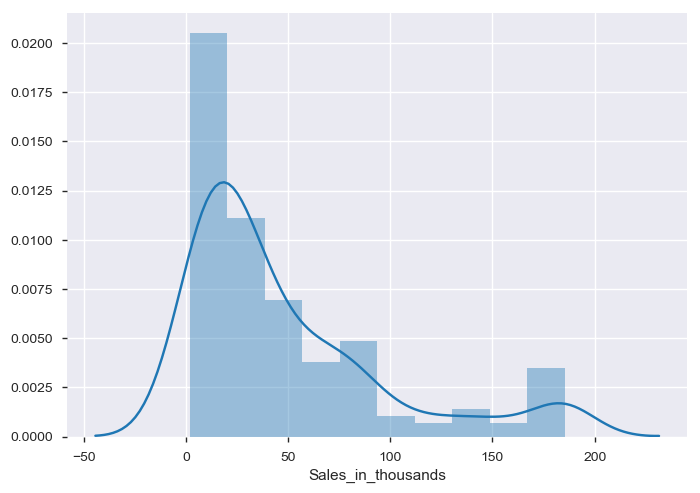

In [192]:
import seaborn as sns
sns.distplot(car_sales_final.Sales_in_thousands)

As we can see our data is not normally distributed, so lets transform Y such that it becomes normal

In [193]:
car_sales_final['ln_Sales_in_thousands'] = np.log(car_sales_final['Sales_in_thousands']+1)

In [194]:
car_sales_final = car_sales_final.drop(['Sales_in_thousands'] , axis = 1)

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


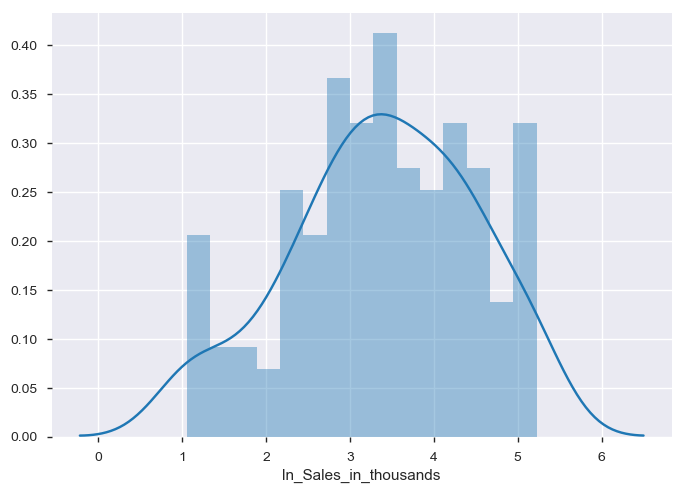

In [195]:
sns.distplot(car_sales_final.ln_Sales_in_thousands , bins=15)

As we can see, after applying logarithmic tranformation on Y, it appears to be almost normally distributed. This will help us in achieving more accuracy for our model

***

### <font color = grey> Correlation between X variables with Y : 
Sometimes transformed X variables (exp, sqrt, square, log) show more correlation with Y variables.
So we'll create a function to calculate all the transformed correlations.</font> 

In [196]:
def linear_relations(x):
    log_x = np.log(x+1)
    exp_x = np.exp(x) 
    sqrt_x = np.sqrt(x)
    square_x = x*x
    coeff = np.corrcoef(car_sales_final['ln_Sales_in_thousands'] , x)[1][0]
    log_coeff = np.corrcoef(car_sales_final['ln_Sales_in_thousands'] , log_x)[1][0]
    exp_coeff = np.corrcoef(car_sales_final['ln_Sales_in_thousands'] , exp_x)[1][0]
    sqrt_coeff = np.corrcoef(car_sales_final['ln_Sales_in_thousands'] , sqrt_x)[1][0]
    square_coeff = np.corrcoef(car_sales_final['ln_Sales_in_thousands'] , square_x)[1][0]
    return (pd.Series([coeff,log_coeff, sqrt_coeff, exp_coeff, square_coeff], 
                  index=['coeff','log_coeff', 'sqrt_coeff', 'exp_coeff', 'square_coeff']))

In [197]:
def missing_imputation_median(x):
    x = x.fillna(x.median())
    return (x)
car_sales_final = car_sales_final.apply(missing_imputation_median)

In [198]:
correlation_summary = car_sales_final.apply(linear_relations).T

In [199]:
correlation_summary.to_csv('correlation_summary')

In [200]:
correlation_summary

,coeff,log_coeff,sqrt_coeff,exp_coeff,square_coeff
four_year_resale_value,-0.421017,-0.410082,-0.417994,-0.316481,-0.415081
Price_in_thousands,-0.556659,-0.528600,-0.544979,-0.406038,-0.562783
Engine_size,-0.094148,-0.090600,-0.091892,-0.100056,-0.097298
Horsepower,-0.391672,-0.361075,-0.376850,-0.403156,-0.416492
Wheelbase,0.221033,0.222372,0.221699,0.199848,0.219770
Width,0.038722,0.035416,0.037046,0.160130,0.042076
Length,0.183250,0.183341,0.183295,0.166077,0.183168
Curb_weight,-0.046145,-0.052808,-0.050508,-0.021305,-0.037884
Fuel_capacity,-0.019659,-0.026316,-0.023250,0.066394,-0.012158
Fuel_efficiency,0.119935,0.107937,0.113863,0.106780,0.130502


List of variables to be dropped due to low correlation with Y : 
- Width
- Curb_weight
- Fuel_capacity
- Manufacturer_BMW
- Manufacturer_Buick
- Manufacturer_Cadillac
- Manufacturer_Chevrolet
- Manufacturer_Chrysler
- Manufacturer_Hyundai
- Manufacturer_Infiniti
- Manufacturer_Jaguar
- Manufacturer_Lincoln
- Manufacturer_Mercury
- Manufacturer_Oldsmobile
- Manufacturer_Pontiac
- Manufacturer_Saab
- Manufacturer_Saturn
- Manufacturer_Subaru
- Manufacturer_Volkswagen


In [204]:
car_sales_final = car_sales_final.drop(['Width','Curb_weight','Fuel_capacity','Manufacturer_BMW','Manufacturer_Buick',
                                        'Manufacturer_Cadillac' , 'Manufacturer_Chevrolet' ,'Manufacturer_Chrysler',
                                        'Manufacturer_Hyundai' ,'Manufacturer_Infiniti' , 'Manufacturer_Jaguar',
                                        'Manufacturer_Lincoln' , 'Manufacturer_Mercury' , 'Manufacturer_Oldsmobile',
                                        'Manufacturer_Pontiac' , 'Manufacturer_Saab' , 'Manufacturer_Saturn' , 
                                        'Manufacturer_Subaru' , 'Manufacturer_Volkswagen'] , axis = 1)

ValueError: labels ['Width' 'Curb_weight' 'Fuel_capacity' 'Manufacturer_BMW'
 'Manufacturer_Buick' 'Manufacturer_Cadillac' 'Manufacturer_Chevrolet'
 'Manufacturer_Chrysler' 'Manufacturer_Hyundai' 'Manufacturer_Infiniti'
 'Manufacturer_Jaguar' 'Manufacturer_Lincoln' 'Manufacturer_Mercury'
 'Manufacturer_Oldsmobile' 'Manufacturer_Pontiac' 'Manufacturer_Saab'
 'Manufacturer_Saturn' 'Manufacturer_Subaru' 'Manufacturer_Volkswagen'] not contained in axis

In [205]:
car_sales_final

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Length,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,...,Manufacturer_Lexus,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands
0,16.360,21.500,1.800,140.0,101.200,172.400,28.00,58.280150,0,0,...,0,0,0,0,0,0,0,0,1,2.885862
1,19.875,28.400,3.200,225.0,108.100,192.900,25.00,91.370778,0,0,...,0,0,0,0,0,0,0,0,1,3.698434
2,18.225,22.799,3.200,225.0,106.900,192.000,26.00,72.030917,0,0,...,0,0,0,0,0,0,0,0,1,2.715621
3,29.725,42.000,3.500,210.0,114.600,196.600,22.00,91.389779,0,0,...,0,0,0,0,0,0,0,0,1,2.260512
4,22.255,23.990,1.800,150.0,102.600,178.000,27.00,62.777639,1,0,...,0,0,0,0,0,0,0,0,1,3.063251
5,23.555,33.950,2.800,200.0,108.700,192.000,22.00,84.565105,1,0,...,0,0,0,0,0,0,0,0,1,2.984671
6,39.000,55.835,4.200,300.0,113.000,198.200,21.00,125.091513,1,0,...,0,0,0,0,0,0,0,0,1,1.054591
7,14.180,26.990,2.500,170.0,107.300,176.000,26.00,71.191207,0,0,...,0,0,0,0,0,0,0,0,1,3.032402
8,28.675,33.400,2.800,193.0,107.300,176.000,24.00,81.877069,0,0,...,0,0,0,0,0,0,0,0,1,2.325422
9,36.125,38.900,2.800,193.0,111.400,188.000,25.00,83.998724,0,0,...,0,0,0,0,0,0,0,0,1,2.919229


In [206]:
car_sales_final.corr()

,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Length,Fuel_efficiency,Power_perf_factor,Manufacturer_Audi,Manufacturer_Dodge,...,Manufacturer_Lexus,Manufacturer_Mercedes-B,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_Sales_in_thousands
four_year_resale_value,1.000000,0.765865,0.444627,0.649256,0.058402,0.088402,-0.362272,0.682164,0.203873,-0.054915,...,0.175737,0.244091,-0.064639,-0.077880,-0.115386,0.431485,-0.008103,-0.061703,0.068279,-0.421017
Price_in_thousands,0.765865,1.000000,0.633382,0.867710,0.231587,0.207781,-0.534373,0.914318,0.135805,-0.085342,...,0.286563,0.391778,-0.081677,-0.078097,-0.054548,0.292676,-0.094928,0.074456,0.021100,-0.556659
Engine_size,0.444627,0.633382,1.000000,0.808058,0.563971,0.604991,-0.758759,0.796719,-0.014050,0.095611,...,0.130830,0.095072,-0.053654,-0.026305,-0.098373,0.022027,-0.109813,-0.159921,-0.279626,-0.094148
Horsepower,0.649256,0.867710,0.808058,1.000000,0.384576,0.437005,-0.603223,0.991443,0.086168,0.002701,...,0.237904,0.225847,-0.085568,-0.070024,-0.059598,0.239634,-0.120525,-0.012773,-0.009067,-0.391672
Wheelbase,0.058402,0.231587,0.563971,0.384576,1.000000,0.837878,-0.500084,0.376980,0.020444,0.172215,...,0.051996,-0.029469,-0.140238,-0.000863,0.070130,-0.251854,-0.096480,-0.092746,-0.359677,0.221033
Length,0.088402,0.207781,0.604991,0.437005,0.837878,1.000000,-0.415676,0.409446,0.024480,0.142828,...,0.039119,-0.122982,-0.090019,-0.020789,-0.124011,-0.162530,-0.111900,-0.063671,-0.120086,0.183250
Fuel_efficiency,-0.362272,-0.534373,-0.758759,-0.603223,-0.500084,-0.415676,1.000000,-0.610681,-0.016491,-0.228288,...,-0.144778,-0.021647,-0.053640,-0.087380,0.065601,-0.067356,0.095557,0.040013,0.605752,0.119935
Power_perf_factor,0.682164,0.914318,0.796719,0.991443,0.376980,0.409446,-0.610681,1.000000,0.091913,-0.016005,...,0.259719,0.265979,-0.085870,-0.071871,-0.059728,0.243532,-0.117823,0.004897,-0.012275,-0.421446
Manufacturer_Audi,0.203873,0.135805,-0.014050,0.086168,0.020444,0.024480,-0.016491,0.091913,1.000000,-0.038311,...,-0.027822,-0.034418,-0.030151,-0.030151,-0.022568,-0.019481,-0.034418,-0.027822,0.082978,-0.129384
Manufacturer_Dodge,-0.054915,-0.085342,0.095611,0.002701,0.172215,0.142828,-0.228288,-0.016005,-0.038311,1.000000,...,-0.054715,-0.067688,-0.059296,-0.059296,-0.044382,-0.038311,-0.067688,-0.054715,-0.177659,0.109420


***

## Linear Regression model :

#### As now we have removed almost all the less correlated variables. So now we'll build a Linear Regression model for this and clean until we get an accurate model:

In [212]:
#  Fisrtly we'll split the data into X and Y variables. using sklearn.cross_validation
from sklearn.cross_validation import train_test_split

train , test = train_test_split(car_sales_final , test_size = 0.3 , random_state = 123)

In [213]:
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency',
       'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep',
       'Manufacturer_Lexus', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_Sales_in_thousands'],
      dtype='object')

In [214]:
train.columns= [phrase.strip().replace('-', '') for phrase in train.columns]
train.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency',
       'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep',
       'Manufacturer_Lexus', 'Manufacturer_MercedesB',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger',
       'ln_Sales_in_thousands'],
      dtype='object')

In [227]:
X_Variables = '+'.join(train.columns.difference(['ln_Sales_in_thousands']))
print(X_Variables)

Engine_size+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value


In [228]:
my_formula = 'ln_Sales_in_thousands~'+X_Variables
print(my_formula)

ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value


In [229]:
import statsmodels.formula.api as smf

In [230]:
lm = smf.ols(formula= my_formula , data = train).fit()

In [231]:
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.669
Method:                    Least Squares   F-statistic:                     10.91
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           1.29e-16
Time:                           00:08:57   Log-Likelihood:                -94.592
No. Observations:                    109   AIC:                             235.2
Df Residuals:                         86   BIC:                             297.1
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [236]:
# REMOVING VARIABLES THAT DON'T HAVE SIGNIFICANT 'P VALUE == 0', ITERATIVELY :
my_formula= 'ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+four_year_resale_value'

In [237]:
lm = smf.ols(formula= my_formula , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.673
Method:                    Least Squares   F-statistic:                     11.56
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           3.73e-17
Time:                           00:19:41   Log-Likelihood:                -94.594
No. Observations:                    109   AIC:                             233.2
Df Residuals:                         87   BIC:                             292.4
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [238]:
# REMOVING 'four_year_resale_value'
my_formula = 'ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_MercedesB+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase'

In [239]:
lm = smf.ols(formula = my_formula , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.676
Method:                    Least Squares   F-statistic:                     12.28
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           1.05e-17
Time:                           00:21:59   Log-Likelihood:                -94.603
No. Observations:                    109   AIC:                             231.2
Df Residuals:                         88   BIC:                             287.7
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [243]:
# Removing 'Manufacturer_MercedesB'
my_formula = 'ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase'

In [244]:
lm = smf.ols(formula = my_formula , data = train ).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.679
Method:                    Least Squares   F-statistic:                     13.05
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           2.98e-18
Time:                           00:25:40   Log-Likelihood:                -94.664
No. Observations:                    109   AIC:                             229.3
Df Residuals:                         89   BIC:                             283.2
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [245]:
my_formula ='ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase'

In [247]:
lm = smf.ols(formula = my_formula , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.735
Model:                               OLS   Adj. R-squared:                  0.681
Method:                    Least Squares   F-statistic:                     13.84
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           9.56e-19
Time:                           00:31:24   Log-Likelihood:                -94.926
No. Observations:                    109   AIC:                             227.9
Df Residuals:                         90   BIC:                             279.0
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [248]:
#Removing 'Manufacturer_Mitsubushi'
my_formula ='ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Audi+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase'

In [249]:
lm = smf.ols(formula = my_formula , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.733
Model:                               OLS   Adj. R-squared:                  0.683
Method:                    Least Squares   F-statistic:                     14.70
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           3.11e-19
Time:                           00:36:06   Log-Likelihood:                -95.239
No. Observations:                    109   AIC:                             226.5
Df Residuals:                         91   BIC:                             274.9
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [250]:
my_formula ='ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase'

In [251]:
lm = smf.ols(formula = my_formula , data =train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.730
Model:                               OLS   Adj. R-squared:                  0.683
Method:                    Least Squares   F-statistic:                     15.56
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           1.21e-19
Time:                           00:37:26   Log-Likelihood:                -95.818
No. Observations:                    109   AIC:                             225.6
Df Residuals:                         92   BIC:                             271.4
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [253]:
# Removing Vehicle_type_passenger'
my_formula ='ln_Sales_in_thousands~Engine_size+Fuel_efficiency+Horsepower+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Nissan+Manufacturer_Plymouth+Manufacturer_Porsche+Manufacturer_Toyota+Power_perf_factor+Price_in_thousands+Wheelbase'

In [254]:
lm = smf.ols(formula = my_formula  , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.724
Model:                               OLS   Adj. R-squared:                  0.679
Method:                    Least Squares   F-statistic:                     16.24
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           8.29e-20
Time:                           00:40:33   Log-Likelihood:                -97.119
No. Observations:                    109   AIC:                             226.2
Df Residuals:                         93   BIC:                             269.3
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [316]:
# Removing 'Manufacturer_Porsche'
my_formula ='ln_Sales_in_thousands~Manufacturer_Ford+Manufacturer_Jeep+Price_in_thousands+Wheelbase'

In [317]:
lm = smf.ols(formula = my_formula , data = train).fit()
print(lm.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Sales_in_thousands   R-squared:                       0.593
Model:                               OLS   Adj. R-squared:                  0.578
Method:                    Least Squares   F-statistic:                     37.93
Date:                   Thu, 19 Jul 2018   Prob (F-statistic):           1.53e-19
Time:                           16:36:40   Log-Likelihood:                -118.19
No. Observations:                    109   AIC:                             246.4
Df Residuals:                        104   BIC:                             259.8
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [318]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [319]:
y, X = dmatrices(my_formula, train, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,278.8,Intercept
1,1.1,Manufacturer_Ford
2,1.0,Manufacturer_Jeep
3,1.2,Price_in_thousands
4,1.2,Wheelbase


In [320]:
test.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency',
       'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep',
       'Manufacturer_Lexus', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger', 'ln_Sales_in_thousands',
       'test_pred', 'Deciles'],
      dtype='object')

In [321]:
train['train_pred'] = lm.predict(train)

In [322]:
test['test_pred'] = lm.predict(test)

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [323]:
test[['ln_Sales_in_thousands','test_pred']].head()

,ln_Sales_in_thousands,test_pred
24,2.941646,1.985266
23,3.310616,3.115259
138,4.172061,3.442824
87,3.315240,3.968482
134,3.873428,3.381585


In [324]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(test.ln_Sales_in_thousands, test.test_pred))
print('MSE:', metrics.mean_squared_error(test.ln_Sales_in_thousands, test.test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test.ln_Sales_in_thousands, test.test_pred)))
print('R-Squre:', metrics.r2_score(test.ln_Sales_in_thousands, test.test_pred))
print('corr between actual & pred:', np.corrcoef(test.ln_Sales_in_thousands, test.test_pred)[1][0])

MAE: 0.691387898543
MSE: 0.809675163712
RMSE: 0.899819517299
R-Squre: 0.21279172197
corr between actual & pred: 0.575479959711


#### Decile Analysis :

In [325]:
test['Deciles']=pd.qcut(test['test_pred'],10, labels=False)

C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [326]:
test[['Deciles' , 'ln_Sales_in_thousands' , 'test_pred']].groupby(test.Deciles).mean()

,Deciles,ln_Sales_in_thousands,test_pred
Deciles,,,
0,0,1.847801,1.581236
1,1,2.445009,2.919207
2,2,3.145845,3.233616
3,3,3.263549,3.377507
4,4,3.679922,3.532322
5,5,3.366743,3.678372
6,6,3.658120,3.844132
7,7,3.492528,3.925874
8,8,3.259344,4.031526


C:\Users\SHIVAM-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


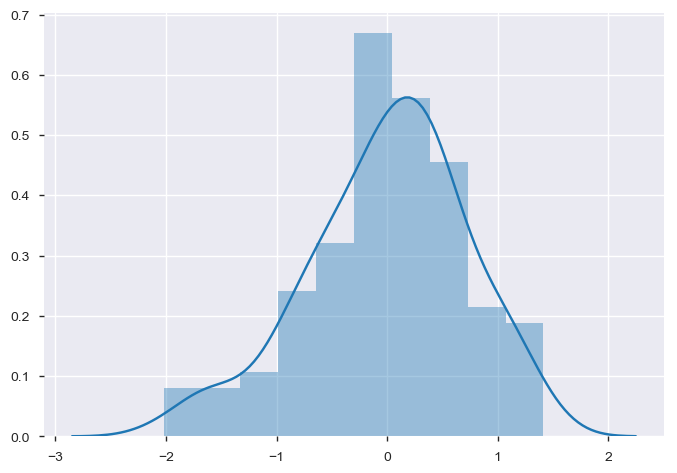

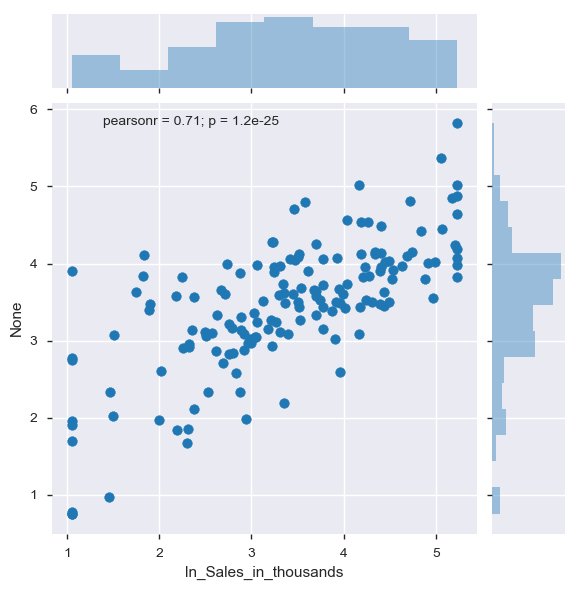

In [327]:
sns.distplot(lm.resid)

sns.jointplot(car_sales_final.ln_Sales_in_thousands, lm.predict(car_sales_final) )

### Building model using sklearn :

In [328]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split

In [329]:
train_x , test_x ,train_y , test_y = train_test_split(car_sales_final.drop(['ln_Sales_in_thousands'],axis=1)
                                                      , car_sales_final['ln_Sales_in_thousands'] ,
                                                      test_size = 0.3 , random_state = 123)


In [330]:
linreg = LinearRegression()

In [331]:
linreg.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [332]:
linreg.coef_

array([ -1.85424621e-03,  -7.90742067e-02,   3.07684326e-01,
        -2.46017602e-02,   5.83236185e-02,  -7.94382651e-04,
         9.30543938e-02,   6.69933499e-02,  -6.23969511e-01,
         7.22013040e-01,   9.64477940e-01,   1.27043947e+00,
         1.38303580e+00,   5.02070394e-01,   8.96568518e-02,
        -2.22142775e-01,   8.58916350e-01,  -1.45589559e+00,
         6.65934052e-01,   6.48376314e-01,  -1.77427924e-01,
        -2.95220491e-01])

In [333]:
train_y_pred = linreg.predict(train_x)
rmse_train = np.sqrt(metrics.mean_squared_error(train_y , train_y_pred))
print(rmse_train)
print(metrics.r2_score(train_y , train_y_pred))

0.576302572162
0.736204636474


In [334]:
test_y_pred = linreg.predict(test_x)
rmse_test = np.sqrt(metrics.mean_squared_error(test_y , test_y_pred))
print(rmse_test)
print(metrics.r2_score(test_y , test_y_pred))

0.909271613488
0.196166501563


In [335]:
residuals = train_y - train_y_pred

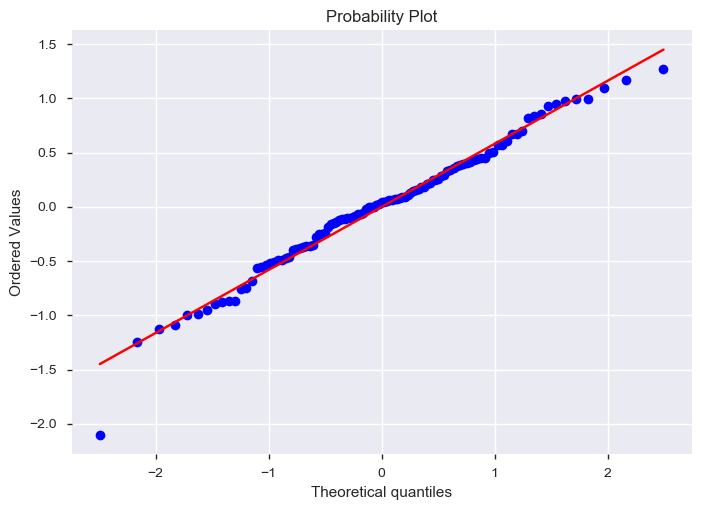

In [336]:
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [337]:
from sklearn.feature_selection import f_regression

In [339]:
F_values, p_values  = f_regression(  train_x, train_y )

In [340]:
F_values

array([ 27.2577908 ,  61.72632847,   0.71776864,  22.64083956,
         4.31324752,   3.48546857,   0.97150849,  27.44194259,
         4.78465747,   3.59191621,  16.80923958,   5.16081124,
         2.62830639,   0.87870023,   7.77392745,   1.92577051,
         2.0657444 ,   4.78292582,   5.34014059,   1.38189141,
         5.55428096,  10.67384695])

In [341]:
['%.3f' % p for p in p_values]

['0.000',
 '0.000',
 '0.399',
 '0.000',
 '0.040',
 '0.065',
 '0.327',
 '0.000',
 '0.031',
 '0.061',
 '0.000',
 '0.025',
 '0.108',
 '0.351',
 '0.006',
 '0.168',
 '0.154',
 '0.031',
 '0.023',
 '0.242',
 '0.020',
 '0.001']

In [342]:
test_x.columns

Index(['four_year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Length', 'Fuel_efficiency',
       'Power_perf_factor', 'Manufacturer_Audi', 'Manufacturer_Dodge',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Jeep',
       'Manufacturer_Lexus', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Plymouth', 'Manufacturer_Porsche', 'Manufacturer_Toyota',
       'Manufacturer_Volvo', 'Vehicle_type_Passenger'],
      dtype='object')